# Data augmentation project

In this project we will classify images with CNN and we are going to make two  models. First wil be  without data augmentation and second with data augmentation. We want to will model with augmentation improve  accuracy of model.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
#downloading dataset from google website
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [3]:
#indicate where to download data(cache_dir) "."  means current directory (untar true will unzip)
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [4]:
#path
data_dir

'./datasets/flower_photos'

In [5]:
#converting into pathlib 
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
#list images with extension ".jpg"
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/6036837996_7fbdcdb3c5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15821959372_518b9dcf57_n.jpg'),
 PosixPath('datasets/flower_photos/roses/515121050_dcb99890be.jpg'),
 PosixPath('datasets/flower_photos/roses/8442304572_2fdc9c7547_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5736328472_8f25e6f6e7.jpg')]

In [7]:
#counting how many images are in dataset
len(list(data_dir.glob('*/*.jpg')))

3670

In [8]:
#list only roses
roses=list(data_dir.glob("roses/*"))
roses[:5]

[PosixPath('datasets/flower_photos/roses/6036837996_7fbdcdb3c5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15821959372_518b9dcf57_n.jpg'),
 PosixPath('datasets/flower_photos/roses/515121050_dcb99890be.jpg'),
 PosixPath('datasets/flower_photos/roses/8442304572_2fdc9c7547_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5736328472_8f25e6f6e7.jpg')]

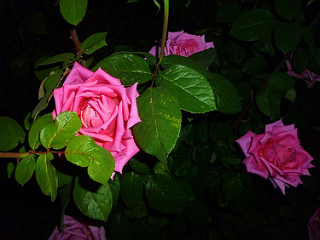

In [9]:
#showing image using PIL
PIL.Image.open(str(roses[1]))

In [10]:
#list only tulips
tulips=list(data_dir.glob("tulips/*"))

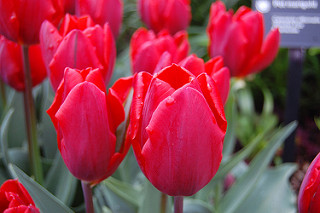

In [11]:
#showing image using PIL
PIL.Image.open(str(tulips[4]))

We will make dictionary of differents flowers and all image paths associate with it. This will make our model building easier.

In [12]:
#dictionary of different flowers
flowers_img_dict={
    "roses":list(data_dir.glob("roses/*")),
    "daisy":list(data_dir.glob("daisy/*")),
    "dandelion":list(data_dir.glob("dandelion/*")),
    "sunflowers":list(data_dir.glob("sunflowers/*")),
    "tulips":list(data_dir.glob("tulips/*")),
}

In [13]:
#checking dictionary
flowers_img_dict["daisy"][:5]

[PosixPath('datasets/flower_photos/daisy/16121105382_b96251e506_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/5133243796_44de429de5_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/1342002397_9503c97b49.jpg'),
 PosixPath('datasets/flower_photos/daisy/2599662355_7782218c83.jpg'),
 PosixPath('datasets/flower_photos/daisy/5512287917_9f5d3f0f98_n.jpg')]

In [14]:
#dictionary with flowers labels
flowers_labels_dict={
    "roses":0,
    "daisy":1,
    "dandelion":2,
    "sunflowers":3,
    "tulips":4,
}

Before we try to open images using cv we need to transform our image path into string.

In [15]:
#open images with cv ()
img= cv2.imread(str(flowers_img_dict["sunflowers"][0]))
img

array([[[247, 207, 188],
        [245, 210, 184],
        [245, 211, 181],
        ...,
        [233, 216, 203],
        [232, 215, 202],
        [232, 215, 202]],

       [[246, 211, 197],
        [244, 212, 189],
        [244, 212, 183],
        ...,
        [232, 214, 203],
        [232, 215, 202],
        [232, 215, 202]],

       [[245, 218, 208],
        [243, 215, 198],
        [242, 211, 186],
        ...,
        [231, 213, 202],
        [231, 214, 201],
        [231, 214, 201]],

       ...,

       [[ 12,  36,  18],
        [ 10,  22,   0],
        [  0,  15,   0],
        ...,
        [ 27,  63,  99],
        [  4,   0,   3],
        [ 36, 130,  99]],

       [[  0,   3,   0],
        [  0,  19,   0],
        [  0,  30,   0],
        ...,
        [ 30,  40,  70],
        [  0,  16,   0],
        [ 36, 104,  87]],

       [[104, 133, 130],
        [ 49, 121,  78],
        [  1,  93,  50],
        ...,
        [ 98, 141, 132],
        [ 83, 119,  95],
        [182, 240, 246]]

In [16]:
#3D image
img.shape

(213, 320, 3)

Images in our dataset are different sizes so we will resize them on unique values.

In [17]:
#resizing
cv2.resize(img,(180,180)).shape

(180, 180, 3)

## Preparing dataset

In [18]:
X=[]
y=[]

for flower_name,images in flowers_img_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [19]:
#verify X 
X[0]

array([[[  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0],
        ...,
        [130, 150,  22],
        [127, 149,  36],
        [121, 146,  38]],

       [[  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0],
        ...,
        [123, 143,  23],
        [125, 145,  33],
        [122, 148,  33]],

       [[  1,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [122, 137,  32],
        [128, 142,  37],
        [129, 149,  36]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [20]:
#verify y
y[:5]

[0, 0, 0, 0, 0]

In [21]:
#Converting X and y into numpy array
X=np.array(X)
y=np.array(y)

In [22]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,random_state=0)

In [23]:
#lenght of train_X
len(train_X)

2752

In [24]:
#lenght of test_X
len(test_X)

918

## Scaling

In [25]:
#scaling
scaled_train_X=train_X/255
scaled_test_X=test_X/255

In [26]:
scaled_train_X[0]

array([[[0.8627451 , 0.90196078, 0.90196078],
        [0.87058824, 0.91372549, 0.91372549],
        [0.88235294, 0.92941176, 0.92941176],
        ...,
        [0.21568627, 0.51372549, 0.38823529],
        [0.14509804, 0.4745098 , 0.3372549 ],
        [0.1254902 , 0.46666667, 0.31764706]],

       [[0.86666667, 0.90196078, 0.90196078],
        [0.87843137, 0.91764706, 0.91764706],
        [0.89411765, 0.9372549 , 0.9372549 ],
        ...,
        [0.20784314, 0.50588235, 0.38039216],
        [0.14901961, 0.47843137, 0.34117647],
        [0.12156863, 0.45882353, 0.30980392]],

       [[0.8745098 , 0.90588235, 0.90588235],
        [0.88627451, 0.91764706, 0.92156863],
        [0.91372549, 0.94117647, 0.94117647],
        ...,
        [0.19607843, 0.50196078, 0.37254902],
        [0.14901961, 0.47843137, 0.34117647],
        [0.12156863, 0.45490196, 0.30980392]],

       ...,

       [[0.18431373, 0.58431373, 0.51372549],
        [0.16470588, 0.57647059, 0.50980392],
        [0.14901961, 0

## Building a CNN model

In [27]:
#defining model
number_of_classes=5 #five different flowers

model=Sequential([
    layers.Conv2D(16,3,padding="same",activation="relu"), # 16 filters and every filter is size 3x3
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding="same",activation="relu"), # 32 filters and every filter is size 3x3
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding="same",activation="relu"),# 64 filters and every filter is size 3x3
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(number_of_classes)
    
    
])

In [28]:
#compile model
model.compile(optimizer="adam",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])

In [29]:
#fitting model
model.fit(scaled_train_X,train_y,epochs=10)

Epoch 1/10
86/86 [==============================] - 76s 856ms/step - loss: 1.6842 - accuracy: 0.3456
Epoch 2/10
86/86 [==============================] - 77s 896ms/step - loss: 0.9915 - accuracy: 0.6109
Epoch 3/10
86/86 [==============================] - 78s 910ms/step - loss: 0.7568 - accuracy: 0.7165
Epoch 4/10
86/86 [==============================] - 79s 916ms/step - loss: 0.5406 - accuracy: 0.7989
Epoch 5/10
86/86 [==============================] - 80s 926ms/step - loss: 0.3849 - accuracy: 0.8688
Epoch 6/10
86/86 [==============================] - 80s 926ms/step - loss: 0.2157 - accuracy: 0.9344
Epoch 7/10
86/86 [==============================] - 80s 928ms/step - loss: 0.0900 - accuracy: 0.9736
Epoch 8/10
86/86 [==============================] - 80s 931ms/step - loss: 0.0548 - accuracy: 0.9875
Epoch 9/10
86/86 [==============================] - 80s 931ms/step - loss: 0.0609 - accuracy: 0.9865
Epoch 10/10
86/86 [==============================] - 81s 939ms/step - loss: 0.0394 - accura

In [30]:
#evaluate model
model.evaluate(scaled_test_X,test_y)

29/29 [==============================] - 9s 291ms/step - loss: 2.2914 - accuracy: 0.6220


[2.291372776031494, 0.6220043301582336]

We can se that for test set we got 62.20% accuracy. This is example of overfitting.

In [31]:
#predictions
predictions=model.predict(scaled_test_X)
predictions

array([[ -5.6211305 ,   2.6105227 ,   2.0156775 ,  -9.346943  ,
         -1.2470144 ],
       [  5.2045927 ,  -1.8190532 ,   3.8303661 , -14.50934   ,
          4.9278774 ],
       [  1.6930463 ,  -0.7154079 ,   1.5395179 , -10.426963  ,
          0.42110252],
       ...,
       [ -4.170559  ,  -8.224234  ,   6.1134076 ,   3.2019331 ,
         -5.882573  ],
       [ 18.200409  ,  -8.107493  ,   5.3892245 , -16.811386  ,
          5.80433   ],
       [ -3.2139614 , -11.971588  ,   2.3660686 ,   6.5789146 ,
          4.5056453 ]], dtype=float32)

In [32]:
#converting numpy array into set of  propability score
score=tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.6916035e-04, 6.3571161e-01, 3.5068896e-01, 4.0756659e-06,
       1.3426197e-02], dtype=float32)>

In [33]:
#maximum value in set
np.argmax(score)

1

In [34]:
#flower number 2 in test_y
test_y[2]

2

We can see that our model did not predicted  good this one.

## Data augmentation

We are going to use data augmentation techique to improve our model accuracy.

In [29]:
#building model
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

### Original image

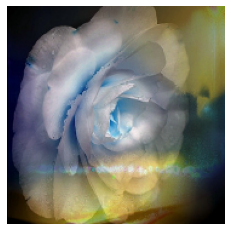

In [36]:
#Plotting original image
plt.axis('off')
plt.imshow(X[0])

## Image with data augmentation

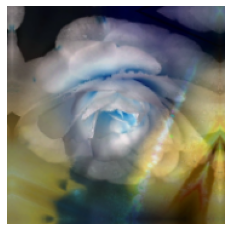

In [37]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

### Train model with data augmentation

In [30]:
#defining model with data augmentation

number_of_classes=5 #five different flowers


aug = Sequential([
  data_augmentation,  #addding augmentation layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1), #random droping 10% neuron in each path
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(number_of_classes)
])

In [31]:
#compile model
aug.compile(optimizer="adam",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])

In [32]:
#fitting model
aug.fit(scaled_train_X,train_y,epochs=10)

Epoch 1/10
86/86 [==============================] - 85s 955ms/step - loss: 1.3550 - accuracy: 0.4014
Epoch 2/10
86/86 [==============================] - 86s 1s/step - loss: 1.0724 - accuracy: 0.5811
Epoch 3/10
86/86 [==============================] - 87s 1s/step - loss: 0.8943 - accuracy: 0.6482
Epoch 4/10
86/86 [==============================] - 88s 1s/step - loss: 0.8706 - accuracy: 0.6717
Epoch 5/10
86/86 [==============================] - 89s 1s/step - loss: 0.8622 - accuracy: 0.6594
Epoch 6/10
86/86 [==============================] - 87s 1s/step - loss: 0.7817 - accuracy: 0.7076
Epoch 7/10
86/86 [==============================] - 89s 1s/step - loss: 0.7359 - accuracy: 0.7168
Epoch 8/10
86/86 [==============================] - 89s 1s/step - loss: 0.7059 - accuracy: 0.7242
Epoch 9/10
86/86 [==============================] - 89s 1s/step - loss: 0.7049 - accuracy: 0.7174
Epoch 10/10
86/86 [==============================] - 89s 1s/step - loss: 0.6442 - accuracy: 0.7568


In [33]:
aug.evaluate(scaled_test_X,test_y)

29/29 [==============================] - 8s 285ms/step - loss: 0.8306 - accuracy: 0.6710


[0.8305984735488892, 0.671023964881897]

# Results

|    Model   | Data Augmentation | Accuracy       |
|------------|-------------------|----------------|
|    CNN     |     NO            |      62.20 %   |
|    CNN     |     YES           |      67.10 %   |

